# Problem Statement

Tasks -

1. Perform Exploratory Data Analysis
2. Create A Sales Dashboard in Tableau/ Power BI

Situation - You are the sales manager of the store and you have to take certain actions which will increase the probable sales of the store. Mention 5 such actions and the actions should be backed by the data provided.

Also, analyze the YOY performance of the store 

Eg. Find your most valuable customers and their avg order size so that you can give optimum discounts to them because according to the Pareto principle 80% of sales comes from 20% of loyal customers.

Ask significant Business Questions and try to find data-backed answers.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_train = pd.read_csv(r'C:\Users\Personal\OneDrive\Documents\Jupyter Notebook\Project_Subhodeep da\train - train.csv')
df_train.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df_train.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df_train.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df_train.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
import datetime

In [8]:
df_train['year'] = pd.DatetimeIndex(df_train['Order Date']).year
df_train['month'] = pd.DatetimeIndex(df_train['Order Date']).month

C:\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Python310\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_

In [9]:
df_train.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11


In [10]:
df_train.year.value_counts()

2018    3258
2017    2534
2016    2055
2015    1953
Name: year, dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
 18  year    

## Visualising Sales month by month

Text(0, 0.5, 'Sales')

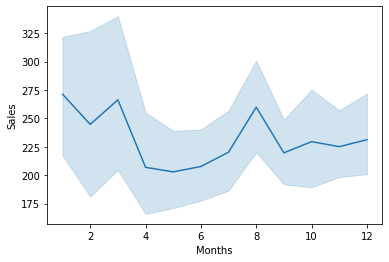

In [12]:
sns.lineplot(x='month', y='Sales',data=df_train)
plt.xlabel('Months')
plt.ylabel('Sales')

## Visualising sales Year by Year

Text(0, 0.5, 'Sales')

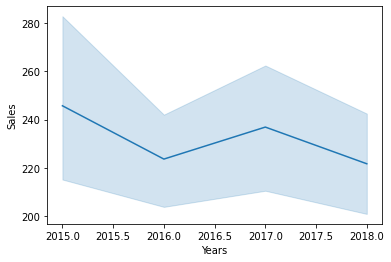

In [13]:
sns.lineplot(x=df_train['year'], y=df_train['Sales'],data=df_train)
plt.xlabel('Years')
plt.ylabel('Sales')

In [14]:
df_train['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
df_cat=df_train.groupby(['Category']).sum().reset_index()
df_cat

,Category,Row ID,Postal Code,Sales,year,month
0,Furniture,10267988,115537643.0,728658.5757,4190735,15075
1,Office Supplies,28852662,324855035.0,705422.3340,11916829,42334
2,Technology,8904250,100677875.0,827455.8730,3656333,13015


## Visualising Sales according to Category

([<matplotlib.patches.Wedge at 0x2259206bf40>,
 [Text(0.6359862605127384, 1.0176057568818209, 'Furniture'),
  Text(-1.1887162868921979, 0.16417548317951158, 'Office Supplies'),
  Text(0.490784424407359, -1.0950482403799102, 'Technology')],
 [Text(0.3709919852990974, 0.593603358181062, '32.2196%'),
  Text(-0.6934178340204487, 0.09576903185471508, '31.1922%'),
  Text(0.28629091423762604, -0.6387781402216142, '36.5882%')])

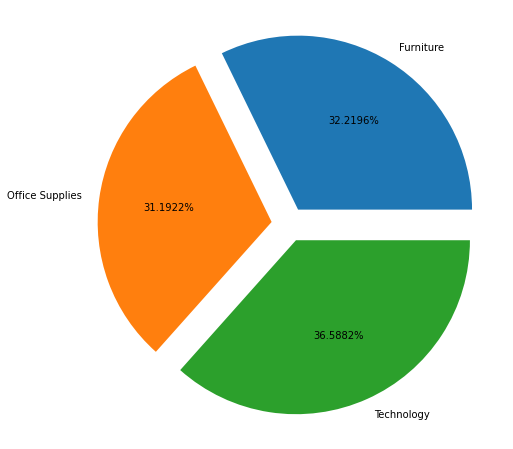

In [16]:
plt.figure(figsize=(18,8))
plt.pie(x= df_cat['Sales'], labels=df_cat['Category'], explode=[0.1,0.1,0.1], autopct='%1.4f%%')

## Top 5 cities according to Cities

In [17]:
df_train['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [18]:
df_cit=df_train.groupby(['City']).sum().reset_index()
df_cit

,City,Row ID,Postal Code,Sales,year,month
0,Aberdeen,9261,57401.0,25.500,2018,11
1,Abilene,6990,79605.0,1.392,2018,11
2,Akron,87312,886240.0,2724.244,40340,113
3,Albuquerque,67175,1219470.0,2220.160,28240,109
4,Alexandria,47898,356864.0,5519.570,32246,56
...,...,...,...,...,...,...
524,Woonsocket,19448,11580.0,195.550,8067,40
525,Yonkers,74122,160515.0,7657.666,30245,71
526,York,23392,87015.0,817.978,10087,36
527,Yucaipa,3348,92399.0,50.800,2016,8


In [19]:
df_cit.sort_values(by=['Sales'], ascending=False, inplace=True)
df_cit.head(10)

,City,Row ID,Postal Code,Sales,year,month
327,New York City,4213827,8928358.0,252462.5470,1796969,6350
265,Los Angeles,3596521,65542378.0,173420.1810,1468120,5113
450,Seattle,2179382,41793552.0,116106.3220,859202,3050
436,San Francisco,2363834,47057201.0,109041.1200,1008358,3647
372,Philadelphia,2481726,10179682.0,108841.7490,1072896,3734
207,Houston,1987227,28821264.0,63956.1428,754212,2619
80,Chicago,1584195,18673450.0,47820.1330,621165,2202
435,San Diego,827518,15650880.0,47521.0290,342781,1265
216,Jacksonville,599775,3843200.0,44713.1830,252101,805
123,Detroit,567542,5545741.0,42446.9440,231923,883


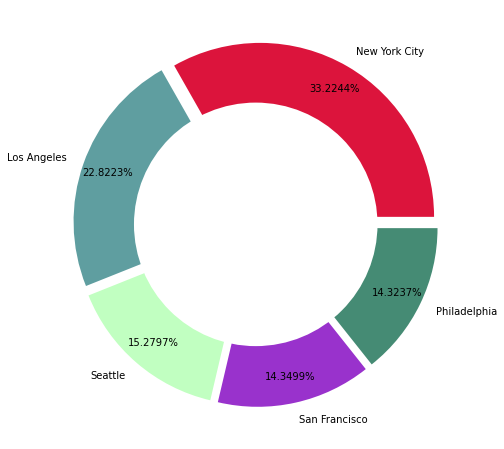

In [20]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(18,8))
plt.pie(df_cit['Sales'][:5], labels= df_cit['City'][:5],autopct='%1.4f%%', pctdistance=0.85,explode=explode,colors=['#DC143C','#5F9EA0','#C1FFC1','#9932CC','#458B74'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

In [21]:
df_train.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8


In [22]:
df_train['Customer ID'].nunique()

793

In [23]:
df_cus=df_train.groupby(['Customer ID']).sum().reset_index()
df_cus.sort_values(by=['Sales'], ascending=False, inplace=True)
df_cus.head(10)

,Customer ID,Row ID,Postal Code,Sales,year,month
700,SM-20320,77545,482091.0,25043.050,30237,94
741,TC-20980,75386,586036.0,19052.218,24194,77
621,RB-19360,69857,914035.0,15117.339,36312,76
730,TA-21385,48932,375032.0,14595.620,20167,94
6,AB-10105,130088,1359311.0,14473.571,40339,160
434,KL-16645,90197,1779734.0,14175.229,58485,200
669,SC-20095,73852,1671032.0,14142.334,44349,169
327,HL-15040,21159,646404.0,12873.298,22175,41
683,SE-20110,96544,1223448.0,12209.438,38316,162
131,CC-12370,65869,472021.0,12129.072,22190,77


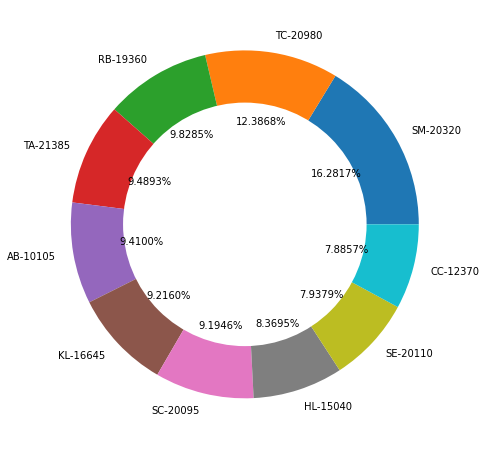

In [24]:
plt.figure(figsize=(18,8))
plt.pie(df_cus['Sales'][:10], labels= df_cus['Customer ID'][:10],autopct='%1.4f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)